In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
%matplotlib inline

El hiperplano para dimensión $p=2$ es $\beta_0 + \beta_1 X_1 + \beta_2 X_2 = 0$, donde el vector $(\beta_1, \beta_2)$ es perpendicular al hiperplano

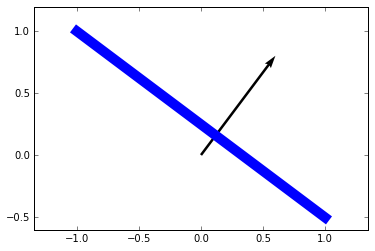

In [3]:
beta  = [0.1, 0.3, 0.4]
n_points = 100
x_1 = np.linspace(-1.0, 1.0, 100)
x_2 = -(x_1 * beta[1] -  beta[0])/beta[2] 
a = plt.plot(x_1,x_2, lw =10)
plt.quiver(beta[1], beta[2],angles='xy',scale_units='xy',scale=0.5)
a = plt.axis('equal')

In [4]:
from sklearn.datasets import make_classification
from sklearn.datasets import make_blobs, make_moons
from sklearn.cross_validation import train_test_split

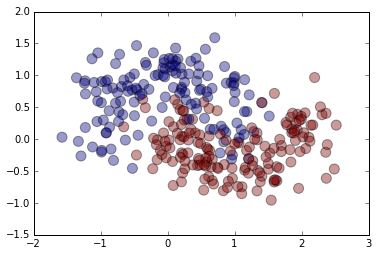

In [20]:
X, Y = make_moons(n_samples=500, noise=0.3)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.4)

plt.scatter(X_train[:, 0], X_train[:, 1], marker='o', c=Y_train, s=100, alpha=0.4)

In [21]:
from sklearn import svm

In [22]:
C = 1.0
linear_svc = svm.SVC(C=C, kernel='linear')
linear_svc.fit(X_train,Y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

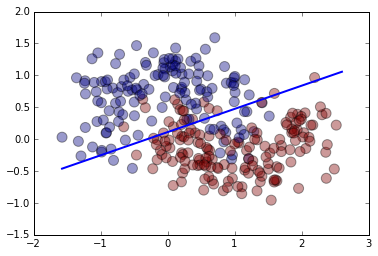

In [23]:
beta = linear_svc.coef_[0]
beta_0 = linear_svc.intercept_

l = - beta[0]/beta[1]

x_1 = np.linspace(X[:,0].min(), X[:,0].max(), 100)
x_2 = l * x_1 - beta_0 / beta[1]
a = plt.plot(x_1,x_2, lw =2)

plt.scatter(X_train[:, 0], X_train[:, 1], marker='o', c=Y_train, s=100, alpha=0.4)

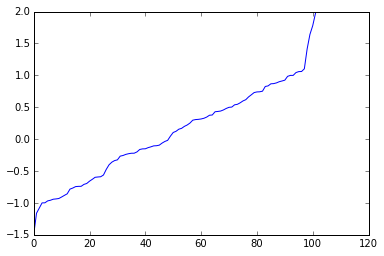

In [24]:
distances = np.sum(linear_svc.support_vectors_*linear_svc.coef_[0], axis=1) + beta_0
dist_sort = np.argsort(distances)
plt.plot(distances[dist_sort])

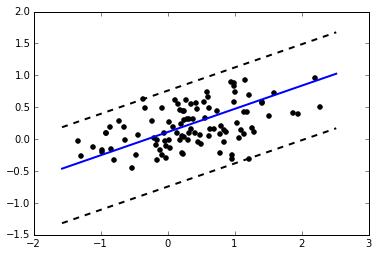

In [25]:
x_1 = np.linspace(X_train[:,0].min(), X_train[:,0].max(), 100)
x_2 = l * x_1 - beta_0 / beta[1]
a = plt.plot(x_1,x_2, lw =2)

b = linear_svc.support_vectors_[dist_sort[0]]
x_2 = l * x_1 + (b[1] - l * b[0])
a = plt.plot(x_1,x_2, '--', color='black', lw =2)

b = linear_svc.support_vectors_[dist_sort[-1]]
x_2 = l * x_1 + (b[1] - l * b[0])
a = plt.plot(x_1,x_2, '--', color='black', lw =2)

plt.scatter(linear_svc.support_vectors_[:,0], linear_svc.support_vectors_[:,1], color='black')

In [26]:
Y_predict = linear_svc.predict(X_test)

In [27]:
n_bad = 1.0 * len(Y_predict[Y_predict != Y_test])
n_total = 1.0 * len(Y_predict)
eff = n_bad / n_total
print(eff)

0.195


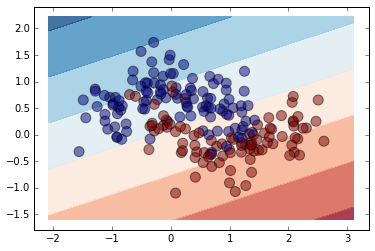

In [28]:
h = 0.02
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
Z = linear_svc.decision_function(np.c_[xx.ravel(), yy.ravel()]) # distancia al plano separador
Z = Z.reshape(xx.shape)

cm = plt.cm.RdBu
plt.contourf(xx, yy, -Z, cmap=cm, alpha=.8) # el signo menos viene por razones puramente esteticas del plot.

plt.scatter(X_test[:, 0], X_test[:, 1], marker='o', c=Y_test, s=100, alpha=0.5)

### Ejercicio

Graficar la eficiencia del SVM clasificador como funcion de C (variandolo en escala logaritmica) para un conjunto de datos similares al utilizado en este notebook y para dos nubes gaussianas de puntos.